# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

# !cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./
# !unzip dataset.zip

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

## PREPROCESSING

In [80]:
import numpy as np
import cv2
from skimage.filters import unsharp_mask
from matplotlib import pyplot as plt
import re

In [81]:
def extract_number(string):
    '''
    Auxiliary function to extract the number of each photo from its path
    '''
    # Using regex to find numbers in the string
    numbers = re.findall(r'\d+', string)
    # Returning the first number found (if any)
    return int(numbers[0]) if numbers else None

In [82]:
#Parameters to generate the arrays containing the paths for all the images
models_path = './dataset/models/ref'
start_mod = 1
end_mod = 14
dnscenes_path = './dataset/denoised_scenes/scene'
scenes_path = './dataset/scenes/scene'
start_sc = 1
end_sc = 12

start_dn = 1
end_dn = 5

# Generate the array of file paths
objs = [f"{models_path}{i}.png" for i in range(start_mod, end_mod + 1)]
scenes = [f"{scenes_path}{i}.png" for i in range(start_sc, end_sc + 1)]
dn_scenes = [f"{dnscenes_path}{i}.png" for i in range(start_dn, end_dn + 1)]

In [83]:
#Save a denoised version of each background
def denoise_scenes(img_path,bil_size, k_size, kind):
    '''
    Function to denoise a single scene according to the input parameters. 
    The denoising will be made trough a median or mean filter first, and a bilateral filter after that.
    #####BEFORE RUNNING THIS CREATE A 'denoised_scenes' folder inside 'dataset'
    '''
    img= cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_index= extract_number(img_path)

    
    if kind=='mean':
        median = cv2.medianBlur(img, k_size)
    elif kind=='median':
        mean_filter7 = np.ones([k_size, k_size])/(k_size**2)
        median = cv2.filter2D(img, -1, mean_filter7)
    #applying bilateral filter
    img = cv2.bilateralFilter(median, bil_size, 35, 150)
    img_write = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    cv2.imwrite(f'./dataset/denoised_scenes/scene{img_index}.png', img_write)

In [84]:
def show_denoising(img):
    '''
    Function to test the denoising techniques, to see which one works best upon a first look.
    '''
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # median = cv2.medianBlur(img, 5)

    # median_7 = cv2.medianBlur(img, 7)

    k_size = 7
    mean_filter7 = np.ones([k_size, k_size])/(k_size**2)
    median_7 = cv2.filter2D(img, -1, mean_filter7)

    k_size = 9
    mean_filter9 = np.ones([k_size, k_size])/(k_size**2)
    median_9 = cv2.filter2D(img, -1, mean_filter9)
    

    #cv2.bilateralFilter(img, filter_size, sigmaColor, sigmaSpace)
    bilateral = cv2.bilateralFilter(img, 5, 200, 75)

    bilateral_median = cv2.bilateralFilter(median_7, 5, 150, 75)

    dst_median = cv2.fastNlMeansDenoisingColored(median_7,None,10,10,7,21)

    bilateral_median7 = cv2.bilateralFilter(median_9, 5, 150, 75)

    dst_median7 = cv2.fastNlMeansDenoisingColored(median_9,None,10,10,7,21)

    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
    
    # Plot each image in its corresponding subplot
    axes[0, 0].imshow(img)
    axes[0, 0].set_title('Original')
    axes[0, 1].imshow(bilateral)
    axes[0, 1].set_title('bilateral')
    axes[1, 0].imshow(bilateral_median)
    axes[1, 0].set_title('bilateral_median')
    axes[1, 1].imshow(dst_median)
    axes[1, 1].set_title('dst_median')
    axes[0, 2].imshow(bilateral_median7)
    axes[0, 2].set_title('bilateral_median7')
    axes[1, 2].imshow(dst_median7)
    axes[1, 2].set_title('dst_median7')
    plt.savefig('./dataset/denoising.png')
    plt.show()
    return dst_median7

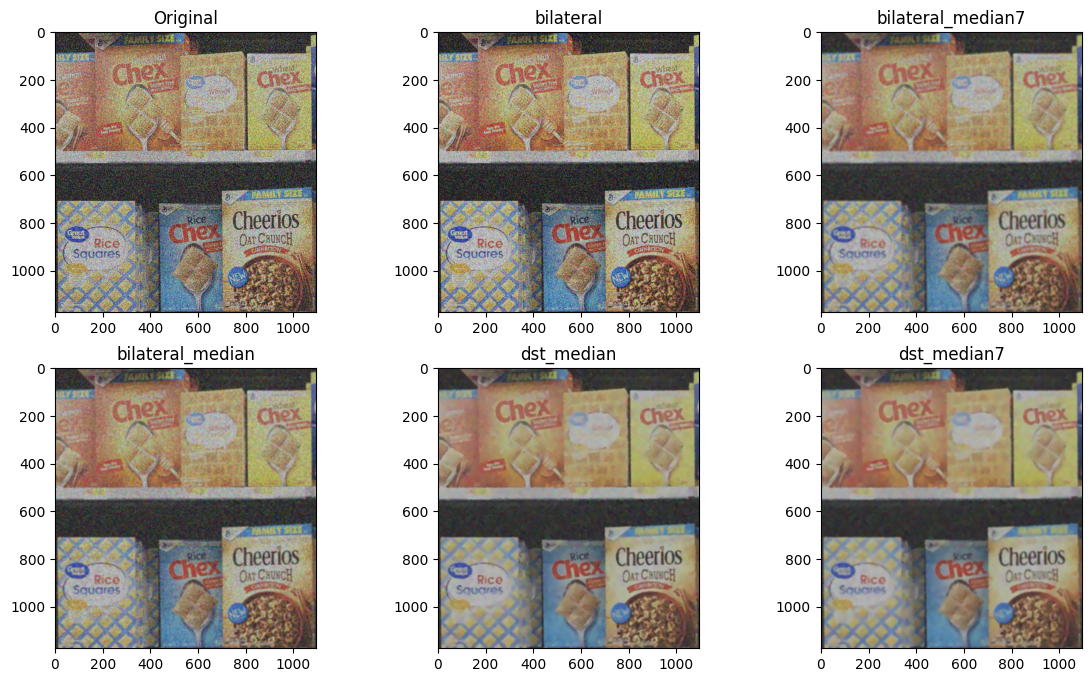

In [85]:
#scene1_dn = show_denoising(scene1_rgb, 5, 1.5, True)
scene1_dn = show_denoising('./dataset/scenes/scene4.png')


In [86]:
for scene in scenes:
    denoise_scenes(scene, 7, 'median')

TypeError: denoise_scenes() missing 1 required positional argument: 'kind'

## Track A

### Find out single istances of products

In [96]:
def show_box(img_train, dst):

    img_train_p = cv2.polylines(img_train,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    plt.imshow(img_train_p, 'gray')
    plt.show()

    pass

In [97]:
def check_matching(img_obj_path, img_scene_path, treshold, show):
    
    #Initiate the images as cv2 objects
    img_ob = cv2.imread(img_obj_path)
    img_obj = cv2.cvtColor(img_ob, cv2.COLOR_BGR2RGB)

    scene_ob = cv2.imread(img_scene_path)
    img_scene = cv2.cvtColor(scene_ob, cv2.COLOR_BGR2RGB)

    #initiate SIFT
    sift =cv2.SIFT_create()

    #Compute key points and descriptors
    kp_query, des_query = sift.detectAndCompute(img_obj, None)
    kp_train, des_train = sift.detectAndCompute(img_scene, None)


    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    #TODO: inspect the matches in some way
    matches = flann.knnMatch(des_query, des_train, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append(m)

    #In order to have more precise results we will use a percentage based treshold instead of
    #a fixed number one
    matching = len(good)/ len(kp_query) * 100
    
    if len(good) > treshold:
        #TODO: show the bounding box of the image
        print(f'{img_obj_path} present in {img_scene_path}')
        
        # building the correspondences arrays of good matches
        src_pts = np.float32([kp_query[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp_train[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        # Using RANSAC to estimate a robust homography.
        # It returns the homography M and a mask for the discarded points
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Mask of discarded point used in visualization
        matchesMask = mask.ravel().tolist()

        # Corners of the query image
        h, w,c = img_obj.shape
        pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

        # Projecting the corners into the train image
        dst = cv2.perspectiveTransform(pts, M)
        if show:
            show_box(img_scene, dst)
        ret_array=[h,w, dst[0][0]]       
        return ret_array
    else:
        #print(f'Not enough matches are found - {len(good)}/{treshold_percentage}')
        return []


In [ ]:
def show_output(prod_instances):
    '''
    this function prints the desired output for the part A of the notebook
    '''
    for product in prod_instances:
        
        print(f"Product: {product['name']} - {product['count']}")
        for instance in product['instances']:
            print(f'\t Instance {34} - position: {instance[2]}, width: {instance[1]} px, height:{instance[0]}px, scene:{instance[3]}')



In [ ]:
#Array containing each product: inside each product we list every instance in which it appears
prod_instances=[]

for obj in objs:
    #For a single object we will have a dictionary containing:
    #Number of the product, number of instances, records for each instance
    prod_description={}
    obj_instances=[]
    prod_description['name'] = extract_number(obj)
    for scene in dn_scenes:
        ret_array= check_matching(obj, scene, 80)
        
        
        #heigth, width, pos = check_matching(obj, scene, 0.027)
        if(len(ret_array)>0):
            ret_array.append(extract_number(scene))
            obj_instances.append(ret_array)
            #print(ret_array)
    prod_description['instances']=obj_instances    
    prod_description['count'] = len(obj_instances)
    prod_instances.append(prod_description)
    #print(f"Name = {prod_description['name']}, Height = {prod_description['instances'][0][0]}, Pos = {prod_description['instances'][0][2]}")
print('###########################')


###########################


In [ ]:
for scene in dn_scenes:
    for obj in objs:
        ret_array= check_matching(obj, scene, 70, False)
    print('\n')

In [ ]:
def start_check(scene,bil_size, k_size, ker_kind, treshold):
    print(f'Testing with \n k_size={k_size}, ker_kind={ker_kind}, bil_size={bil_size} \n')
    denoise_scenes(scene,bil_size, k_size, ker_kind)
    for t in treshold:
        print(f'threshold {t}')
        for obj in objs:
            ret_array= check_matching(obj, './dataset/denoised_scenes/scene4.png', t, False)
        print('\n')

In [ ]:
show_output(prod_instances)

threshold 15
./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene4.png


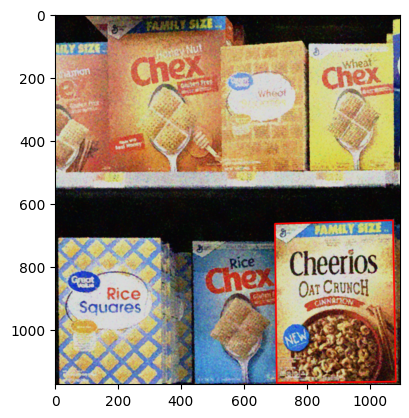

./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene4.png


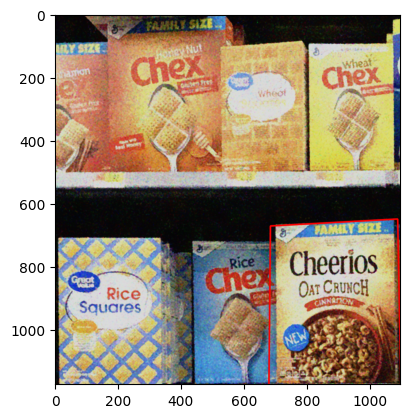

./dataset/models/ref3.png present in ./dataset/denoised_scenes/scene4.png


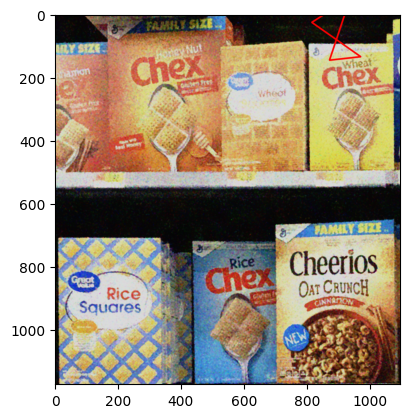

./dataset/models/ref4.png present in ./dataset/denoised_scenes/scene4.png


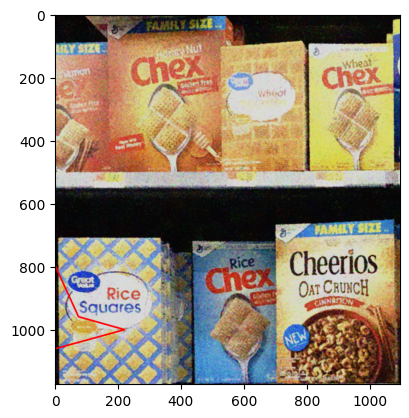

./dataset/models/ref5.png present in ./dataset/denoised_scenes/scene4.png


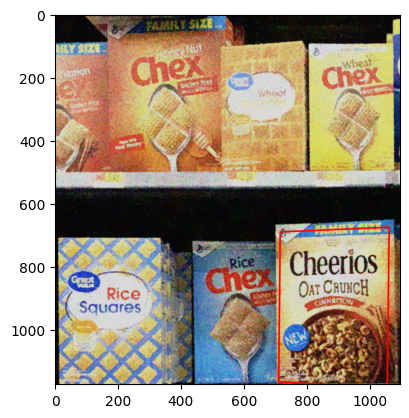

./dataset/models/ref6.png present in ./dataset/denoised_scenes/scene4.png


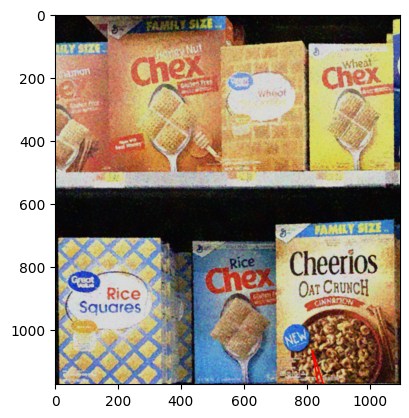

./dataset/models/ref7.png present in ./dataset/denoised_scenes/scene4.png


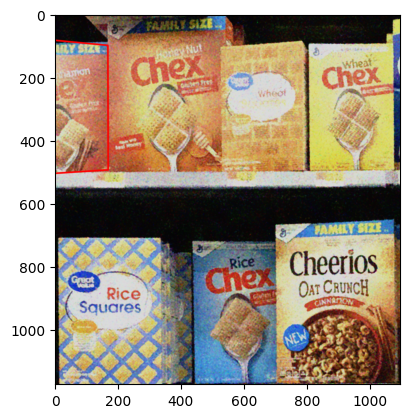

./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene4.png


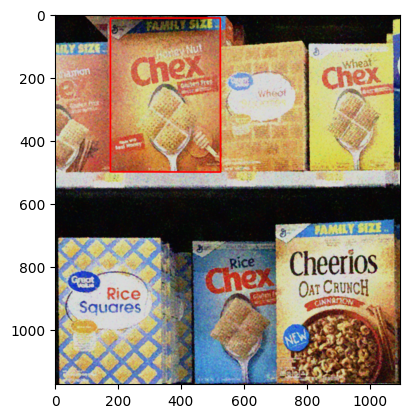

./dataset/models/ref9.png present in ./dataset/denoised_scenes/scene4.png


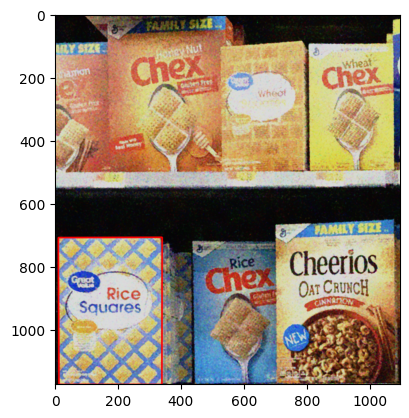

./dataset/models/ref10.png present in ./dataset/denoised_scenes/scene4.png


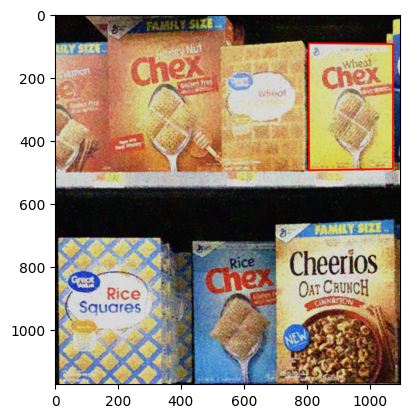

./dataset/models/ref13.png present in ./dataset/denoised_scenes/scene4.png


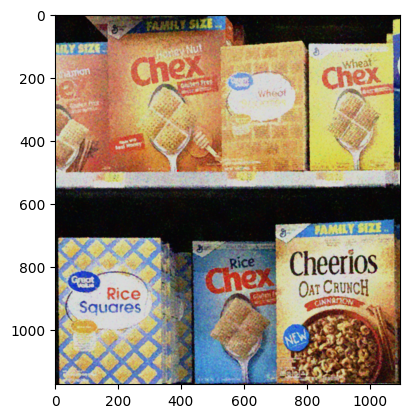

./dataset/models/ref14.png present in ./dataset/denoised_scenes/scene4.png


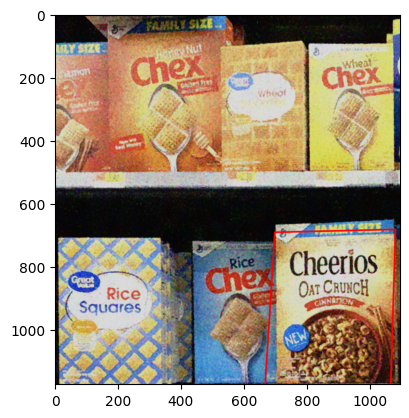

In [101]:
preferred_tresh = [15]
for t in preferred_tresh:
    print(f'threshold {t}')
    for obj in objs:
        ret_array= check_matching(obj, './dataset/denoised_scenes/scene4.png', t, True)
    print('\n')

In [94]:
preferred_tresh = [ 50, 52, 54, 56, 58, 60, 64, 66, 67, 70]
# #good treshold 44-52. returns 1,2,5,8,9
# start_check('./dataset/scenes/scene4.png',50, 5, 'median', preferred_tresh)
# #50,52->1,2,5,8,9
# start_check('./dataset/scenes/scene4.png',70, 5, 'median', preferred_tresh)
# #54->1,2,8,9
# start_check('./dataset/scenes/scene4.png',100, 5, 'median', preferred_tresh)

# # #chiavica
# # start_check('./dataset/scenes/scene4.png',50, 7, 'median', preferred_tresh)
# # #chiavica
# # start_check('./dataset/scenes/scene4.png',70, 7, 'median', preferred_tresh)
# # #chiavica
# # start_check('./dataset/scenes/scene4.png',100, 7, 'median', preferred_tresh)

# #start_check('./dataset/denoised_scenes/scene4.png', 7, 'mean', preferred_tresh)
# #50->1,8,9
# start_check('./dataset/scenes/scene4.png',50, 9, 'mean', preferred_tresh)
# #54->1,8,9
# start_check('./dataset/scenes/scene4.png',70, 9, 'mean', preferred_tresh)
# #chiavica
# start_check('./dataset/scenes/scene4.png',100, 9, 'mean', preferred_tresh)

#64,66, 70->1,8,9
start_check('./dataset/scenes/scene4.png',50, 5, 'mean', preferred_tresh)
#70->1,8,9
start_check('./dataset/scenes/scene4.png',70, 5, 'mean', preferred_tresh)
#70->1,8,9
start_check('./dataset/scenes/scene4.png',100, 5, 'mean', preferred_tresh)
#best is 1,2,8,9
start_check('./dataset/scenes/scene4.png',150, 5, 'mean', preferred_tresh)
#70->1,8,9
start_check('./dataset/scenes/scene4.png',200, 5, 'mean', preferred_tresh)

Testing with 
 k_size=5, ker_kind=mean, bil_size=50 

threshold 50
./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref5.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref9.png present in ./dataset/denoised_scenes/scene4.png


KeyboardInterrupt: 

In [ ]:
# start_check('./dataset/scenes/scene4.png',50, 7, 'mean', preferred_tresh)
# start_check('./dataset/scenes/scene4.png',70, 7, 'mean', preferred_tresh)
# start_check('./dataset/scenes/scene4.png',100, 7, 'mean', preferred_tresh)
# start_check('./dataset/scenes/scene4.png',150, 7, 'mean', preferred_tresh)
# start_check('./dataset/scenes/scene4.png',200, 7, 'mean', preferred_tresh)

Testing with 
 k_size=7, ker_kind=mean, bil_size=50 

threshold 50
./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref9.png present in ./dataset/denoised_scenes/scene4.png


threshold 52
./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref9.png present in ./dataset/denoised_scenes/scene4.png


threshold 54
./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref5.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene4.png
./dataset/model